In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep = ',')
df.head()

,Unnamed: 0,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
0,57,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,36.0
1,59,11.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,54.0
2,61,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,51.0
3,65,11.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,24.0
4,94,11.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,65.0


In [116]:
# Padronização do dataset (média e desvio padrão, valores entre -1 e 1)

defaut_df = (df - df.mean()) / df.std()
defaut_df

,Unnamed: 0,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
0,-2.099331,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,0.947754,-0.239913,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,0.721360,-1.035448,-1.083674,-0.306041,-0.818803
1,-2.099307,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,-0.552342,-0.239913,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,-1.386187,-1.035448,-1.083674,-0.306041,0.243693
2,-2.099282,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,0.947754,-0.239913,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,-1.386187,-1.035448,-1.083674,-0.306041,0.066610
3,-2.099233,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,0.947754,-0.239913,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,0.721360,1.052122,-1.083674,-0.306041,-1.527133
4,-2.098878,-1.820040,0.993316,-0.775740,-0.636859,-0.651431,-0.494182,-0.286184,-0.552342,-0.239913,...,-0.426369,-0.896779,-0.744639,-0.323735,-0.746286,-1.386187,1.052122,-1.083674,-0.306041,0.892995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.500608,1.815839,-1.006669,0.202448,-0.636859,0.361303,0.668078,1.509260,-0.552342,-0.239913,...,0.149584,1.546281,1.342068,-0.323735,0.059980,0.721360,-1.035448,-0.086542,-0.306041,0.125638
16772,1.500927,1.815839,-1.006669,0.202448,-0.636859,-0.651431,-0.494182,-0.286184,-0.552342,-0.239913,...,0.149584,0.324751,0.298714,-0.323735,0.059980,0.721360,-1.035448,-0.086542,-0.306041,1.837435
16773,1.501160,1.815839,-1.006669,1.180637,0.413264,0.361303,-0.494182,-0.286184,2.447850,-0.239913,...,1.877444,1.546281,1.863744,-0.323735,1.672510,-1.386187,0.356266,0.910590,0.052814,0.184665
16774,1.501957,1.815839,-1.006669,1.180637,1.463387,2.386771,-0.494182,-0.286184,2.447850,1.033751,...,0.725538,0.324751,-0.222963,5.158402,0.866245,0.721360,-1.035448,1.907722,0.052814,0.302720


In [117]:
df = (df - df.min()) / (df.max() - df.min())
df

,Unnamed: 0,UF,Diagnóstico Depressão,Estado de Saúde,Pouco Interesse,Sentimento Depressivo,Sentimento de Fracasso,Ideação Suicida,Consumo Álcool,Dias Álcool,...,Motivo Não Visita,Toma Medicamentos,Último Atendimento,Compareceu Consulta,Limitação Atividade,Sexo,Raça,Estado de Saúde Geral,Motivo Impedimento,Idade
0,0.000194,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000,0.00,0.000000,0.195402
1,0.000201,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.402299
2,0.000208,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.367816
3,0.000221,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.375,0.00,0.000000,0.057471
4,0.000320,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.375,0.00,0.000000,0.528736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,0.999544,1.0,0.0,0.25,0.000000,0.333333,0.333333,0.333333,0.0,0.000000,...,0.111111,1.0,0.666667,0.000000,0.2,1.0,0.000,0.25,0.000000,0.379310
16772,0.999632,1.0,0.0,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.111111,0.5,0.333333,0.000000,0.2,1.0,0.000,0.25,0.000000,0.712644
16773,0.999697,1.0,0.0,0.50,0.333333,0.333333,0.000000,0.000000,1.0,0.000000,...,0.444444,1.0,0.833333,0.000000,0.6,0.0,0.250,0.50,0.071429,0.390805
16774,0.999918,1.0,0.0,0.50,0.666667,1.000000,0.000000,0.000000,1.0,0.142857,...,0.222222,0.5,0.166667,1.000000,0.4,1.0,0.000,0.75,0.071429,0.413793


In [118]:
min_max_scaler = preprocessing.MinMaxScaler()
x = df.values # Retorna um array do tipo numpy
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

normalized_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000194,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000,0.00,0.000000,0.195402
1,0.000201,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.402299
2,0.000208,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000,0.00,0.000000,0.367816
3,0.000221,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.375,0.00,0.000000,0.057471
4,0.000320,0.0,1.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.375,0.00,0.000000,0.528736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,0.999544,1.0,0.0,0.25,0.000000,0.333333,0.333333,0.333333,0.0,0.000000,...,0.111111,1.0,0.666667,0.000000,0.2,1.0,0.000,0.25,0.000000,0.379310
16772,0.999632,1.0,0.0,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.111111,0.5,0.333333,0.000000,0.2,1.0,0.000,0.25,0.000000,0.712644
16773,0.999697,1.0,0.0,0.50,0.333333,0.333333,0.000000,0.000000,1.0,0.000000,...,0.444444,1.0,0.833333,0.000000,0.6,0.0,0.250,0.50,0.071429,0.390805
16774,0.999918,1.0,0.0,0.50,0.666667,1.000000,0.000000,0.000000,1.0,0.142857,...,0.222222,0.5,0.166667,1.000000,0.4,1.0,0.000,0.75,0.071429,0.413793


In [119]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values
array

array([[1.94063694e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.95402299e-01],
       [2.00872946e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.02298851e-01],
       [2.07682199e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.67816092e-01],
       ...,
       [9.99696988e-01, 1.00000000e+00, 0.00000000e+00, ...,
        5.00000000e-01, 7.14285714e-02, 3.90804598e-01],
       [9.99918289e-01, 1.00000000e+00, 0.00000000e+00, ...,
        7.50000000e-01, 7.14285714e-02, 4.13793103e-01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.00000000e-01, 0.00000000e+00, 4.48275862e-01]])

In [120]:
X = array[:,0:len(df.columns)-1]
Y = array[:,len(df.columns)-1]
print("X:", len(X), "Y:", len(Y))

X: 16776 Y: 16776


In [121]:
test_size = 0.3 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [122]:
rf = RandomForestRegressor()

rf.fit(X_train, Y_train)
predict = rf.predict(X_test)
explained_variance = metrics.explained_variance_score(Y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
mse = metrics.mean_squared_error(Y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
median_absolute_error = metrics.median_absolute_error(Y_test, predict)
r2 = metrics.r2_score(Y_test, predict)

# Mostrando o resultado de desempenho do modelo
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))
#OLS(Y_test, predictions).fit().summary()


Ex.V:  0.2634105156698363
MSLE:  0.01574049573999948
R2  :  0.26225075863271763
MAE :  0.1266653649134106
MSE :  0.027961368360287293
RMSE:  0.16721653136065015


Text(0.5, 1.0, 'Gráfico de Dispersão de Valores Reais vs. Valores Previstos')

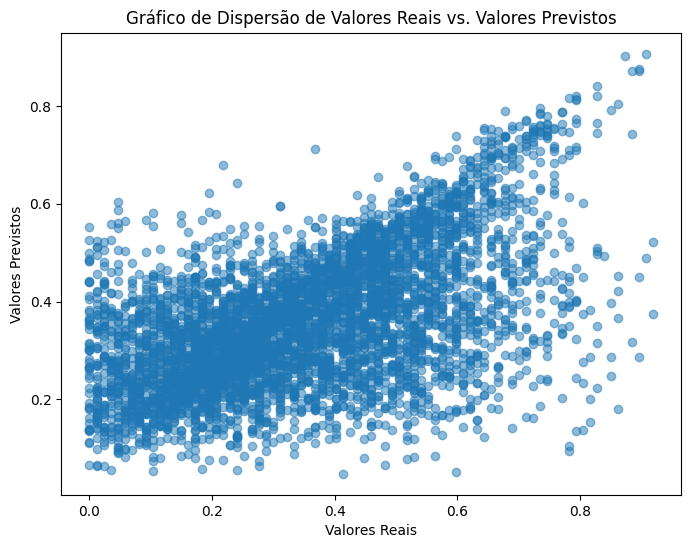

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predict, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')

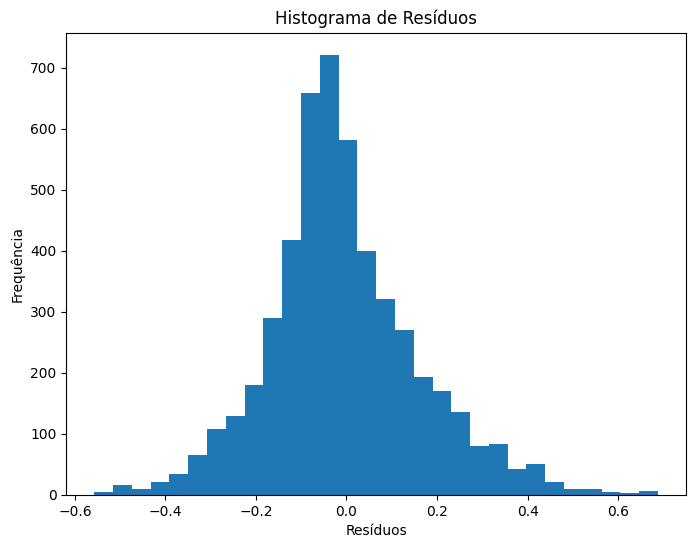

In [124]:
# Histograma de Resíduos
residuals = Y_test - predict
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()


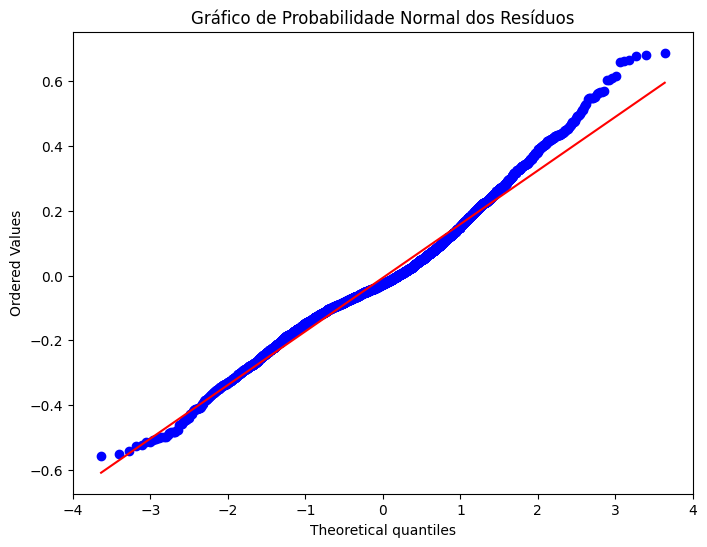

In [125]:
# Gráfico de Probabilidade Normal dos Resíduos
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Gráfico de Probabilidade Normal dos Resíduos')
plt.show()

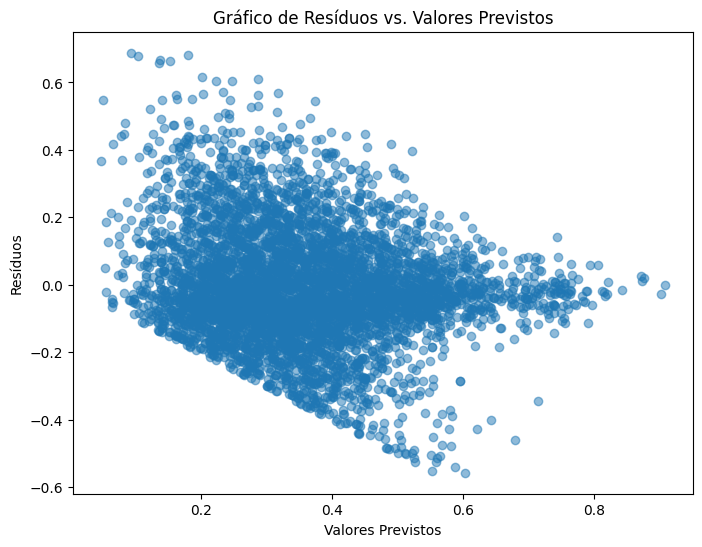

In [126]:
# Gráfico de Resíduos vs. Valores Previstos
plt.figure(figsize=(8, 6))
plt.scatter(predict, residuals, alpha=0.5)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [127]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, Y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

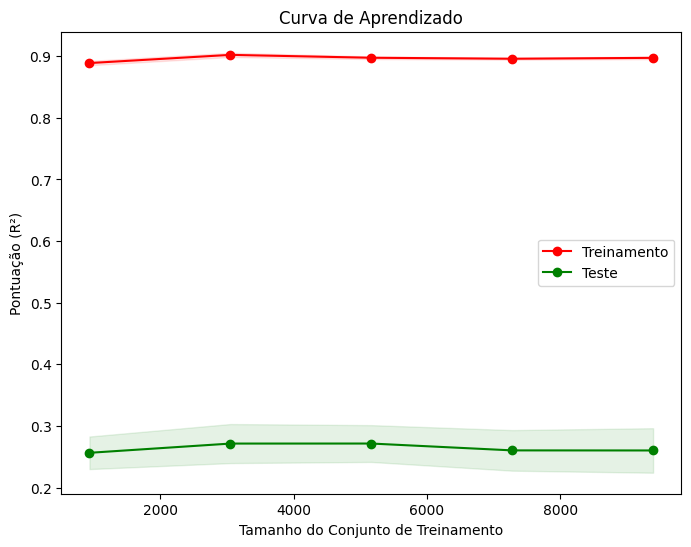

In [128]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()